# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [8]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [9]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [10]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.15,1631.50,2.00,52.00,21.60,679.45
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.85,3542.25,4.50,125.25,46.59,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [11]:
# Filter rural apartments
df = df_orig.loc[(df_orig['pop_dens'] <= 500)]


### Shape (number of rows and colums)

In [12]:
# Number of rows and columns
print(df.shape)

(73, 16)


### Data types

In [13]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [14]:
df.describe()
#df_orig.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,47.479552,8.640515,123.479452,4.315068,124.356164,0.0,2515.643836,22.120822,3451.260274,315.792984,970.958904,15.989450,79500.825311
std,0.112931,0.161741,88.808644,1.097683,69.192840,0.0,634.450426,5.283739,2112.962987,120.152973,731.460591,5.695623,10193.499255
min,47.224941,8.367652,1.000000,1.500000,46.000000,0.0,1420.000000,5.560000,698.000000,87.959866,144.000000,7.547170,62000.541872
25%,47.421207,8.485293,57.000000,3.500000,91.000000,0.0,2000.000000,19.000000,2067.000000,250.442478,472.000000,13.316640,72133.750580
50%,47.507187,8.655200,100.000000,4.500000,110.000000,0.0,2450.000000,22.430000,3073.000000,321.231767,824.000000,14.776057,77073.351903
75%,47.549870,8.794328,213.000000,5.500000,140.000000,0.0,2850.000000,25.230000,4393.000000,424.146341,1207.000000,19.114605,84738.954195
max,47.675091,8.915933,298.000000,6.500000,585.000000,0.0,4600.000000,35.000000,10096.000000,485.659214,3460.000000,27.126628,105013.570634


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [15]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 73 Min: 1420.0 Max: 4600.0 Mean: 2515.6 Median: 2450.0 Std: 634.5
Area: Count: 73 Min: 46.0 Max: 585.0 Mean: 124.4 Median: 110.0 Std: 69.2


### Skewness

In [16]:
df[['price','rooms', 'area']].skew()

price    0.513198
rooms   -0.078634
area     4.416077
dtype: float64

### Kurtosis

In [17]:
df[['price','rooms', 'area']].kurtosis()

price     0.292797
rooms    -0.175695
area     27.210247
dtype: float64

### Extreme values

In [18]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
762,1693998280-447,"Grabenwiese 2, 8484 Weisslingen, ZH",47.426781,8.767586,180,Weisslingen,6.5,585.0,0,3250.0,5.56,3364,262.607338,886.0,10.434007,84173.291925


In [19]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


### Get a list of categories of categorical variable

In [20]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Aeugst am Albis', 'Altikon', 'Andelfingen', 'Bauma', 'Brütten',
       'Dättlikon', 'Elsau', 'Freienstein-Teufen', 'Glattfelden',
       'Hausen am Albis', 'Hittnau', 'Hochfelden', 'Knonau',
       'Laufen-Uhwiesen', 'Lindau', 'Lufingen', 'Mettmenstetten',
       'Neftenbach', 'Niederweningen', 'Ossingen', 'Rheinau',
       'Rickenbach (ZH)', 'Russikon', 'Schlatt (ZH)', 'Stadel',
       'Stallikon', 'Steinmaur', 'Trüllikon', 'Wald (ZH)', 'Weiach',
       'Weisslingen', 'Wiesendangen', 'Wila', 'Zell (ZH)'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [21]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5,6.0,6.5
luxurious,,,,,,,,,,
0,1,1,5,1,19,2,25,14,1,4


### Pivot tables

In [22]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.5   0             1   46.000000     1  1420.000000            1  30.870000
2.0   0             1   72.000000     1  1850.000000            1  25.690000
2.5   0             5   67.400000     5  1778.000000            5  26.946000
3.0   0             1   70.000000     1  2450.000000            1  35.000000
3.5   0            19   94.000000    19  2165.789474           19  23.183158
4.0   0             2  165.000000     2  2490.000000            2  15.510000
4.5   0            25  118.200000    25  2609.240000           25  22.508400
5.5   0            14  153.571429    14  3055.785714           14  20.408571
6.0   0             1  220.000000     1  2800.000000            1  12.730000
6.5   0             4  278.000000     4  3022.500000            4  13.967500

### Correlation matrix

In [23]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.996239,0.997598,-0.716472,-0.198837,-0.975973
area,0.996239,1.000000,0.989010,-0.768770,-0.221758,-0.974685
price,0.997598,0.989010,1.000000,-0.667469,-0.144816,-0.963347
price_per_m2,-0.716472,-0.768770,-0.667469,1.000000,0.584271,0.777764
pop_dens,-0.198837,-0.221758,-0.144816,0.584271,1.000000,0.404551
frg_pct,-0.975973,-0.974685,-0.963347,0.777764,0.404551,1.000000


### Covariance matrix

In [24]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.204909,46.316781,432.530441,-3.049985,-17.684575,-2.140412
area,46.316781,4787.649163,24783.392504,-238.375852,-963.137183,-103.803904
price,432.530441,24783.392504,402527.343607,-252.503314,936.399399,-1229.077764
price_per_m2,-3.049985,-238.375852,-252.503314,27.917899,125.342124,3.171133
pop_dens,-17.684575,-963.137183,936.399399,125.342124,14436.736929,364.911932
frg_pct,-2.140412,-103.803904,-1229.077764,3.171133,364.911932,32.440116


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

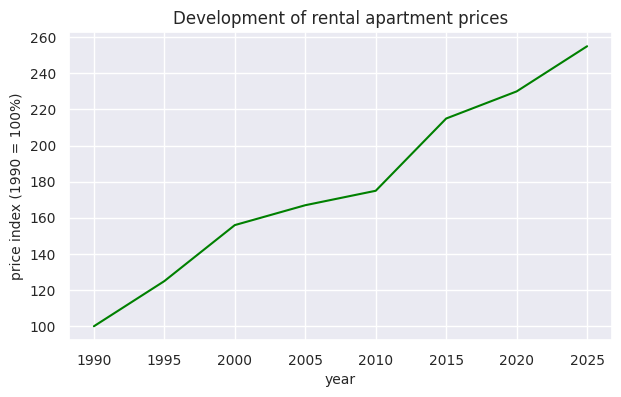

In [25]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

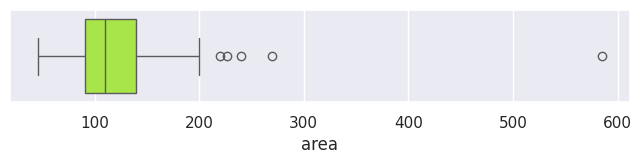

In [26]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

<Axes: xlabel='price_per_m2'>

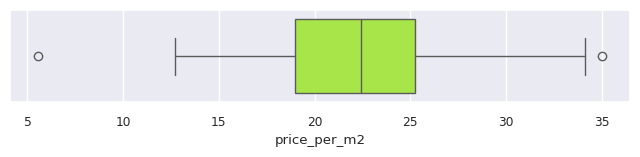

In [40]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_per_m2'], color="greenyellow")

### Histogram  (matplotlib)

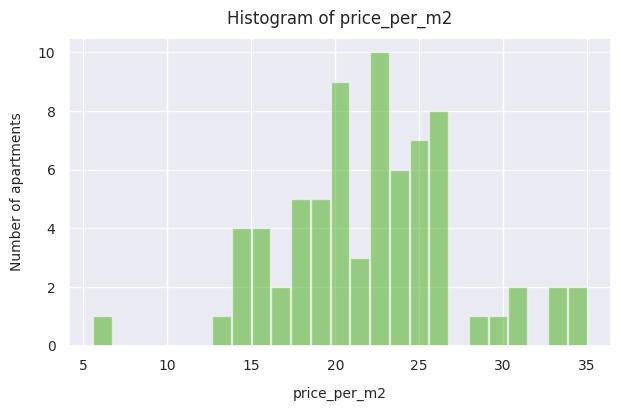

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

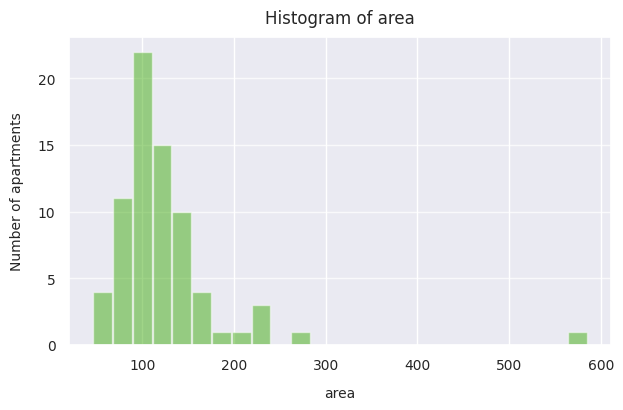

In [41]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['area'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

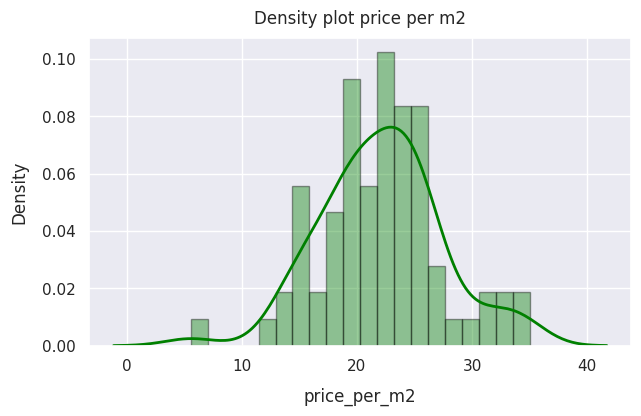

In [28]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
671   46.0 -1.132432
747   55.0 -1.002360
708   60.0 -0.930099
294   67.0 -0.828932
548   70.0 -0.785575
..     ...       ...
670  220.0  1.382279
687  227.0  1.483446
291  240.0  1.671327
686  270.0  2.104897
762  585.0  6.657392

[73 rows x 2 columns]


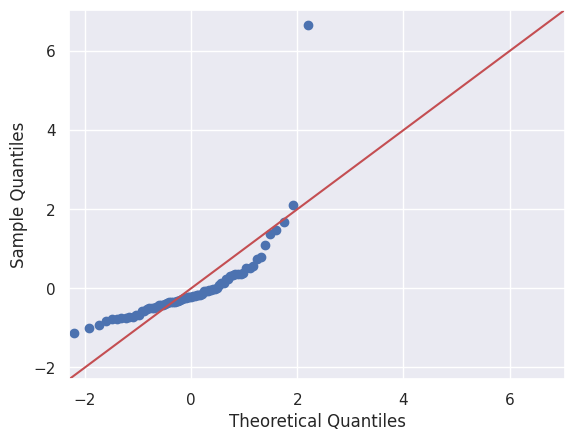

In [29]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [30]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[3.0, 6.0, 1.5, 2.0, 4.0, 6.5, 2.5, 5.5, 3.5, 4.5]

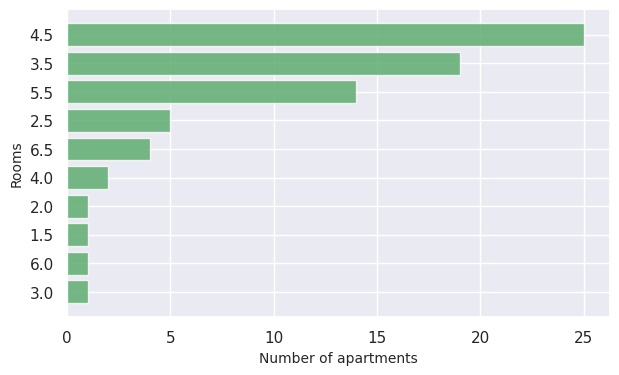

In [31]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

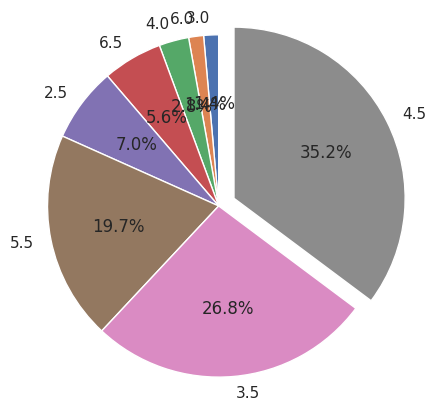

In [32]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

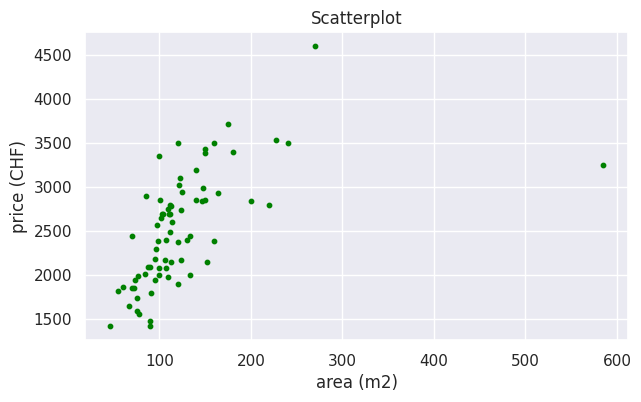

In [33]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(73, 17)
5.176526445599574
1871.9108620116035


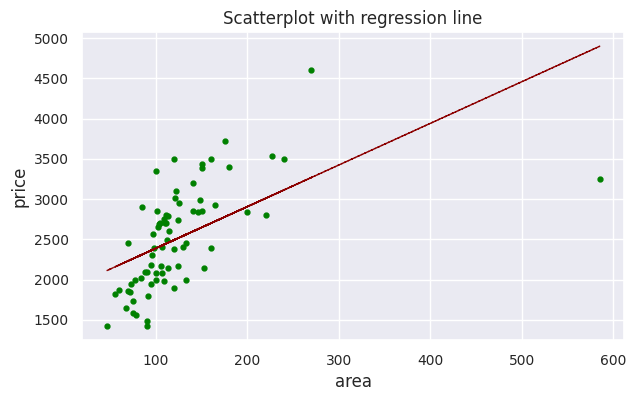

In [34]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

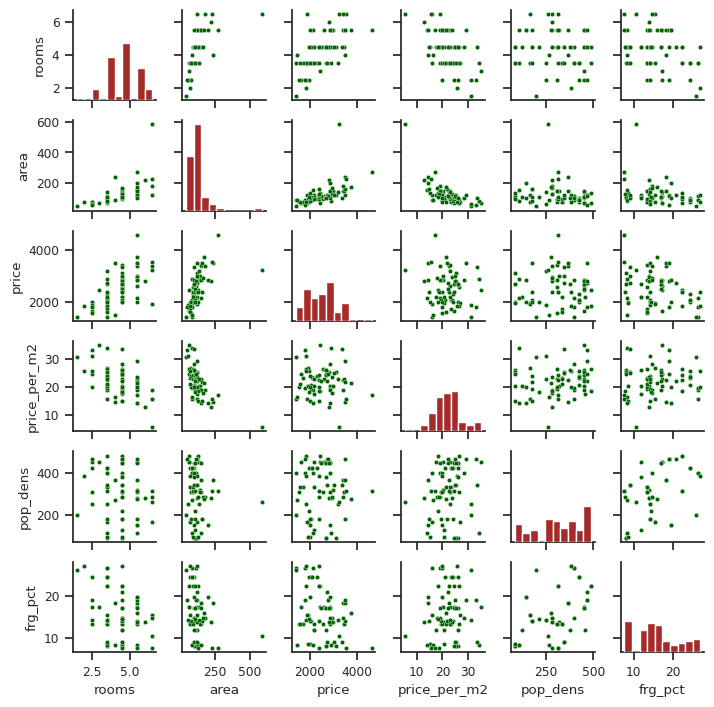

In [35]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(68, 17)


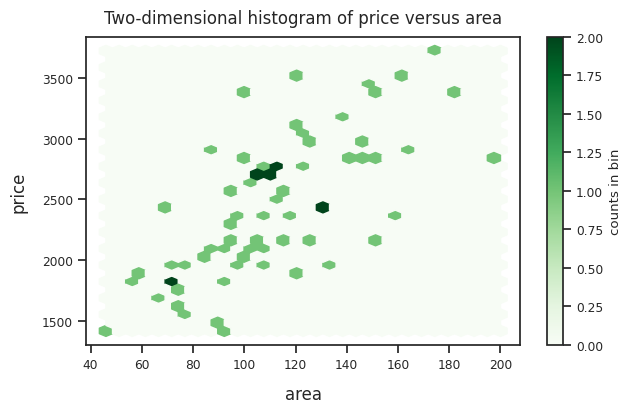

In [36]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

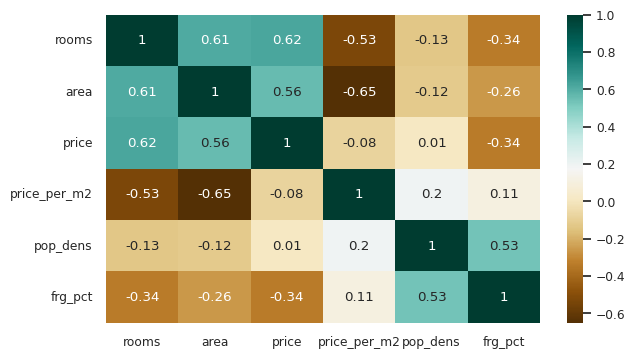

In [37]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

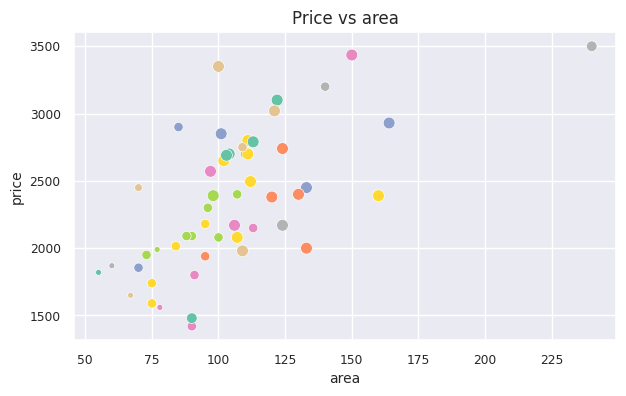

In [38]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [39]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-09 17:08:08
Python Version: 3.11.10
-----------------------------------
